In [260]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt

In [261]:
data = pd.read_csv("data/adults_Outliers_done.csv")

In [262]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Craft-repair,Own-child,White,Female,0,0,30,United-States,<=50K


In [263]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Here we will transform categorical features into numerical :)

In [264]:
numerical_columns = data.dtypes[data.dtypes == 'O'].index
numerical_columns = numerical_columns[:-1] # Cause income is our y (what we wanna predict)
print("Unique value count: ")
total = 0
for col in numerical_columns:
    print(f"{col} has: {len(data[col].unique())}")
    total += len(data[col].unique())
print(f"Total unique values are: {total}")

Unique value count: 
workclass has: 8
education has: 12
marital-status has: 7
occupation has: 14
relationship has: 6
race has: 5
gender has: 2
native-country has: 41
Total unique values are: 95


## Taking these categories i.e, top n
### workclass -> top 3
### education -> top 3
### marital-status -> top 3
### occupation ->  top 5
### relationship -> top 3
### race -> top 2
### gender -> top 2
### native-country -> top 1


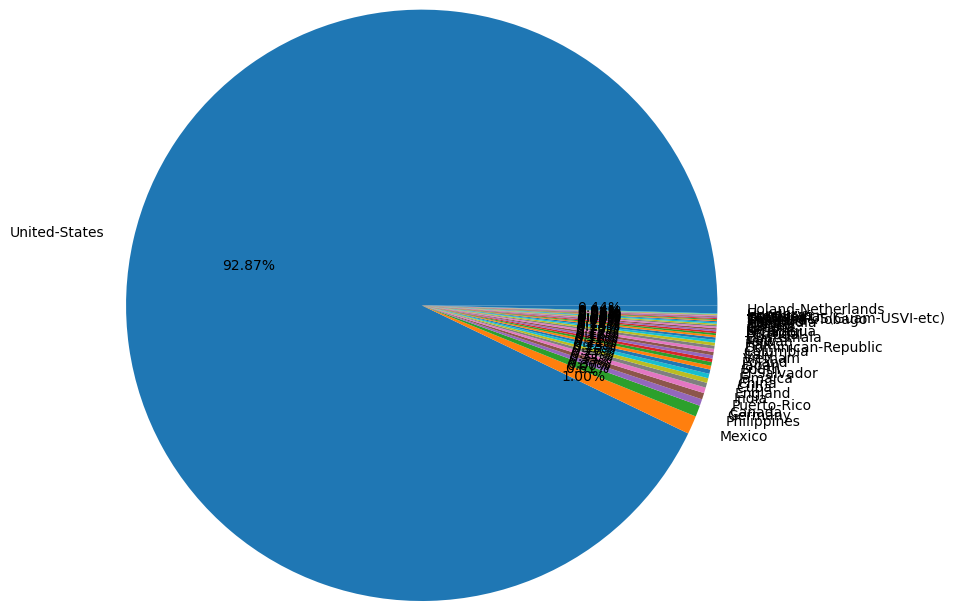

<Figure size 700x500 with 0 Axes>

In [265]:
df1 = data['native-country'].value_counts()
labels = df1.index
numbers = df1.values
df1[-1], df1[3] = df1[3], df1[-1]

fig, ax = plt.subplots()
plt.figure(figsize=(7, 5))
ax.pie(numbers, labels=labels, labeldistance=1.1, radius=2, autopct='%1.2f%%');

In [266]:
top_ = [3, 3, 3, 5, 3, 2, 2, 1]

def remove_and_encode(data, col, top):
    to_take = data[col].unique()[:top]

    # make other values to be nan in this respective column
    data[col] = np.where(data[col].isin(to_take), data[col], np.nan)
    data = pd.get_dummies(data=data, columns=[col], drop_first=True)
    return data

In [267]:
len(data.columns), numerical_columns

(15,
 Index(['workclass', 'education', 'marital-status', 'occupation',
        'relationship', 'race', 'gender', 'native-country'],
       dtype='object'))

In [268]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Craft-repair,Own-child,White,Female,0,0,30,United-States,<=50K


In [269]:
for col, top in zip(numerical_columns, top_):
    data = remove_and_encode(data, col, top)

In [270]:
len(data.columns)

21

In [271]:
data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Private,workclass_Self-emp-not-inc,education_Assoc-acdm,...,marital-status_Never-married,marital-status_Widowed,occupation_Farming-fishing,occupation_Machine-op-inspct,occupation_Other-service,occupation_Protective-serv,relationship_Not-in-family,relationship_Own-child,race_White,gender_Male
0,25,226802,7,0,0,40,<=50K,1,0,0,...,1,0,0,1,0,0,0,1,0,1
1,38,89814,9,0,0,50,<=50K,1,0,0,...,0,0,1,0,0,0,0,0,1,1
2,28,336951,12,0,0,40,>50K,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,44,160323,10,7688,0,40,>50K,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,18,103497,10,0,0,30,<=50K,1,0,0,...,1,0,0,0,0,0,0,1,1,0


## Now we will encode the label

In [274]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [275]:
df = labelencoder.fit_transform(data["income"])

In [277]:
data["income"] = df

In [278]:
data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Private,workclass_Self-emp-not-inc,education_Assoc-acdm,...,marital-status_Never-married,marital-status_Widowed,occupation_Farming-fishing,occupation_Machine-op-inspct,occupation_Other-service,occupation_Protective-serv,relationship_Not-in-family,relationship_Own-child,race_White,gender_Male
0,25,226802,7,0,0,40,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1
1,38,89814,9,0,0,50,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
2,28,336951,12,0,0,40,1,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,44,160323,10,7688,0,40,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,18,103497,10,0,0,30,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0


In [280]:
labelencoder.classes_

array(['<=50K', '>50K'], dtype=object)

In [281]:
data.to_csv("data/feature_engineering_done.csv", index=False)